In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import plotly.express as px
import math


In [5]:
df = pd.read_csv('data/michael_saad/normalized_estimated_dispersion.txt', sep = '\t')
df.columns = 'P' + df.columns.str.strip('Align.sortedByCoord.out.bam').str.lstrip('STAR2.out').str.lstrip('put.')
df = df.replace(0,np.NAN).dropna(axis = 0, how = 'all').fillna(0)

In [7]:
scaler = StandardScaler()
scaler.fit(df.T)
scaled = scaler.transform(df.T)

pca = PCA(n_components = 2)
pca.fit(scaled)

components = pca.transform(scaled)
pca_df = pd.DataFrame(data = components, columns = ['Principal Component 1', 'Principal Component 2'])
pca_df.index = df.columns

pca_df['meta'] = pca_df.index
pca_df[['Passage', "protocol_replicate"]] = pca_df.meta.str.split('_', n = 1, expand = True)
pca_df['Protocol'] = pca_df.protocol_replicate.str[0]
pca_df['Replicate'] = pca_df.protocol_replicate.str[1]
pca_df = pca_df.drop(['meta','protocol_replicate'], axis = 1)
pca_df['Passage_Protocol'] = pca_df.Passage + '_' + pca_df.Protocol

C:\Users\Omen PC\AppData\Local\Temp\ipykernel_17484\487259535.py:5: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


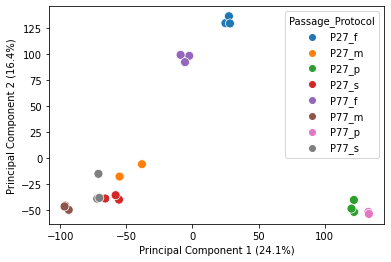

In [8]:
fig = plt.figure()
sns.scatterplot(data = pca_df, x = "Principal Component 1", y = "Principal Component 2", hue = 'Passage_Protocol', s = 80)
plt.xlabel('Principal Component 1 (' + str(round(pca.explained_variance_ratio_[0]*100,1)) + '%)' )
plt.ylabel('Principal Component 2 (' + str(round(pca.explained_variance_ratio_[1]*100,1)) + '%)' )
fig.show()

C:\Users\Omen PC\AppData\Local\Temp\ipykernel_17484\393861570.py:5: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


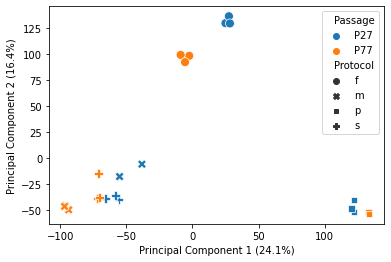

In [9]:
fig = plt.figure()
sns.scatterplot(data = pca_df, x = "Principal Component 1", y = "Principal Component 2", hue = 'Passage', style = 'Protocol', s = 80)
plt.xlabel('Principal Component 1 (' + str(round(pca.explained_variance_ratio_[0]*100,1)) + '%)' )
plt.ylabel('Principal Component 2 (' + str(round(pca.explained_variance_ratio_[1]*100,1)) + '%)' )
fig.show()

C:\Users\Omen PC\AppData\Local\Temp\ipykernel_17484\4249343255.py:5: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


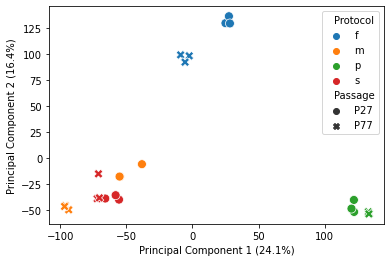

In [10]:
fig = plt.figure()
sns.scatterplot(data = pca_df, x = "Principal Component 1", y = "Principal Component 2", hue = 'Protocol', style = 'Passage', s = 80)
plt.xlabel('Principal Component 1 (' + str(round(pca.explained_variance_ratio_[0]*100,1)) + '%)' )
plt.ylabel('Principal Component 2 (' + str(round(pca.explained_variance_ratio_[1]*100,1)) + '%)' )
fig.show()

In [11]:
fig = px.scatter(pca_df, x = "Principal Component 1", y = "Principal Component 2", symbol = "Protocol", color="Passage", 
           labels = {'Principal Component 1': 'Principal Component 1 (' + str(round(pca.explained_variance_ratio_[0]*100,1)) + '%)',
                     'Principal Component 2': 'Principal Component 2 (' + str(round(pca.explained_variance_ratio_[1]*100,1)) + '%)'})

fig.update_traces(marker={'size': 12})
fig.show()

In [12]:
df_scaled = pd.DataFrame(scaled.T, index = df.index, columns = df.columns)

In [13]:
#sns.clustermap(df_scaled, cmap="PiYG")

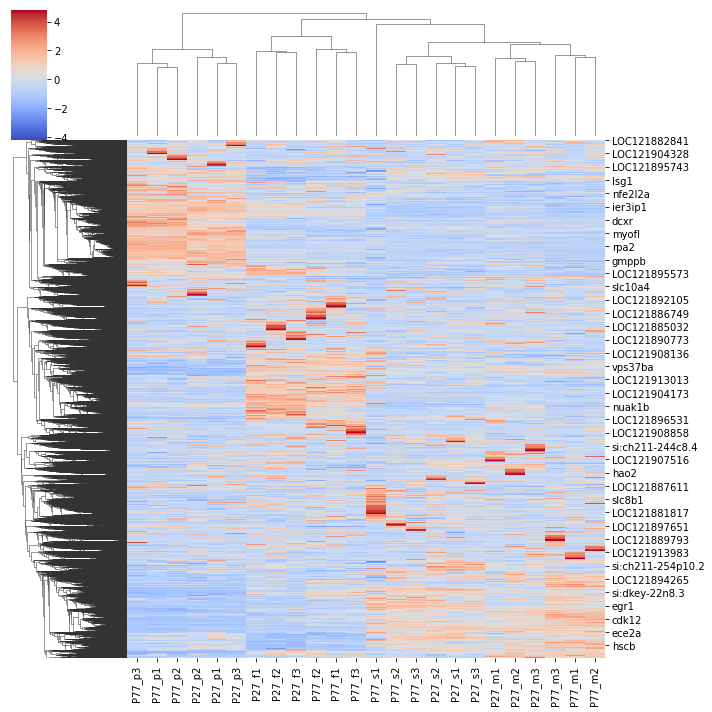

In [14]:
sns.clustermap(df_scaled, cmap = 'coolwarm')

In [15]:
df_pca_loadings = pd.DataFrame(pca.components_.T, columns = ['PC1', 'PC2'], index = df.index)
df_pca_loadings_contribution = pd.DataFrame(pca.components_.T * np.sqrt(pca.explained_variance_), columns = ['PC1', 'PC2'], index = df.index)

PC1_top20 = df_pca_loadings.sort_values(by = ['PC1'], ascending=False).head(20)
PC1_bottom20 = df_pca_loadings.sort_values(by = ['PC1'], ascending=True).head(20)
PC2_top20 = df_pca_loadings.sort_values(by = ['PC2'], ascending=False).head(20)
PC2_bottom20 = df_pca_loadings.sort_values(by = ['PC2'], ascending=True).head(20)

In [16]:
def barplot_goi(search_term):
    # Input: search_term as string; script will search for genes with this string present
    # Output: barplots for genes with search_term in it
    # Process: search for genes of interest then plot just those genes and all samples
    goi = df.index[df.index.str.contains(search_term)]
    
    fig, a = plt.subplots(len(goi),1,figsize=(12, len(goi)*3),tight_layout=True)
    fig = df.loc[goi].T.plot.bar(ax = a, subplots = True, legend=False)


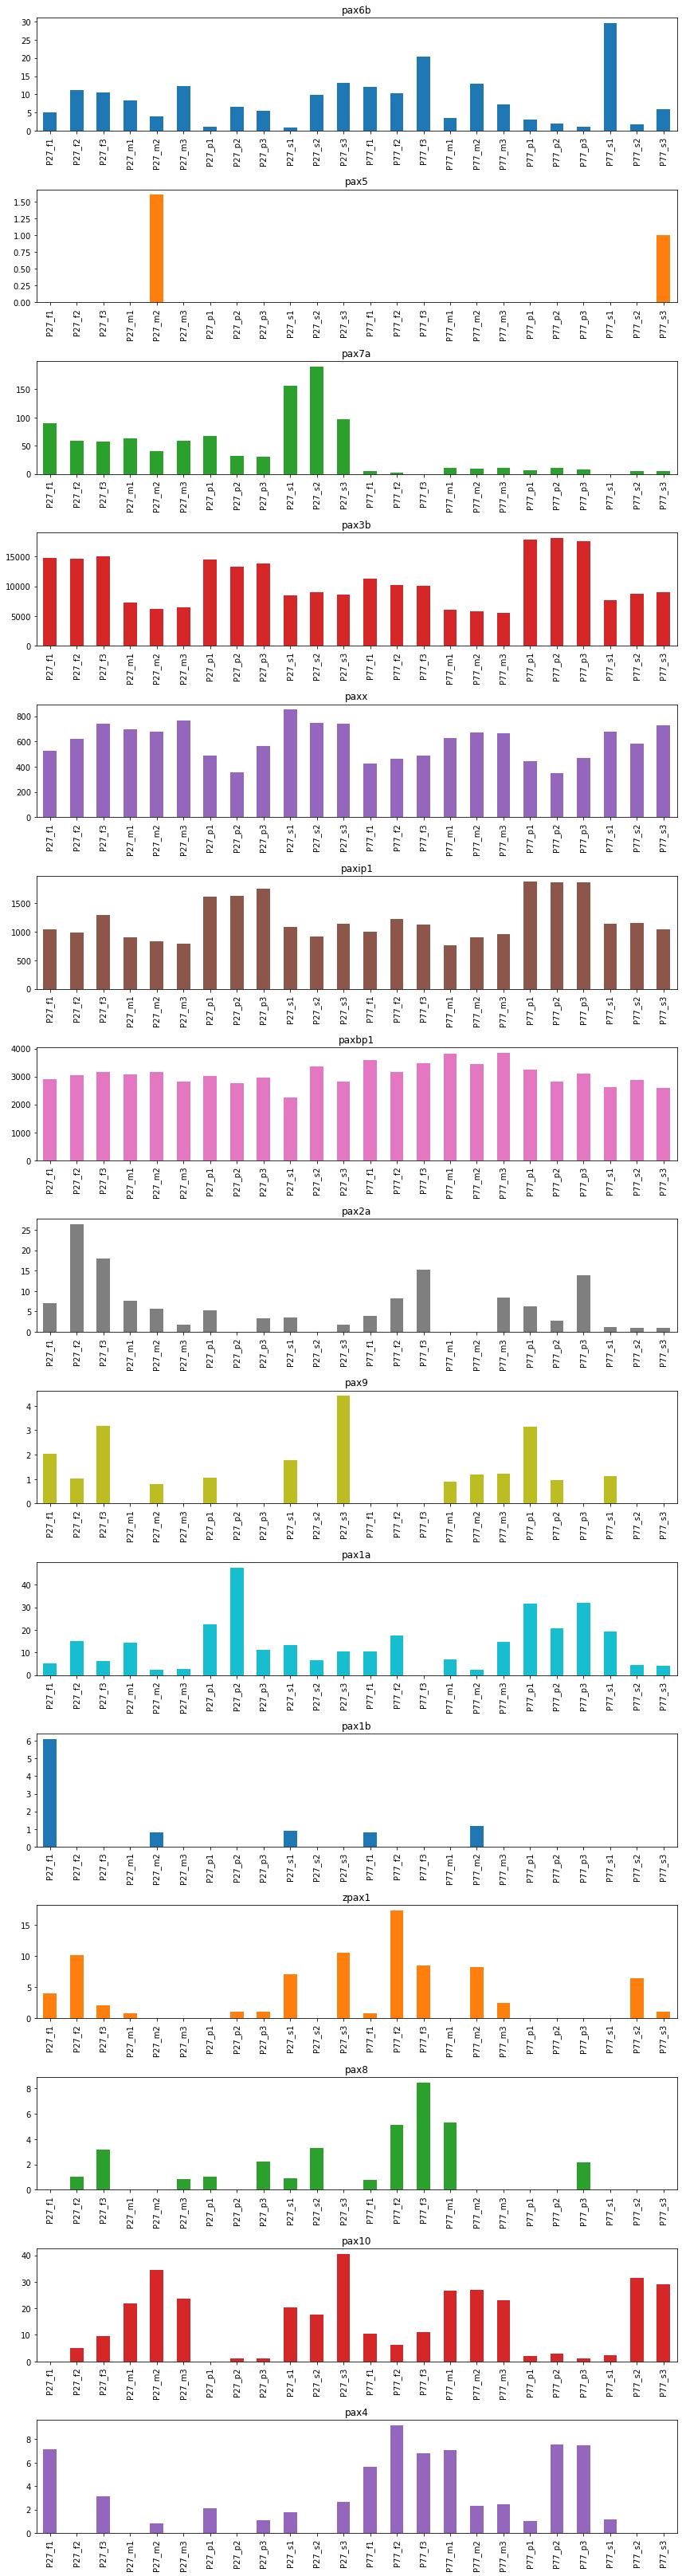

In [17]:
barplot_goi('pax')

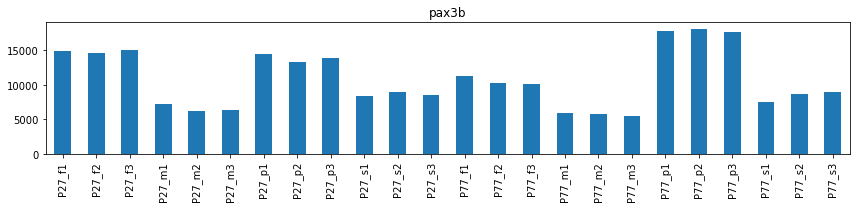

In [18]:
barplot_goi('pax3')

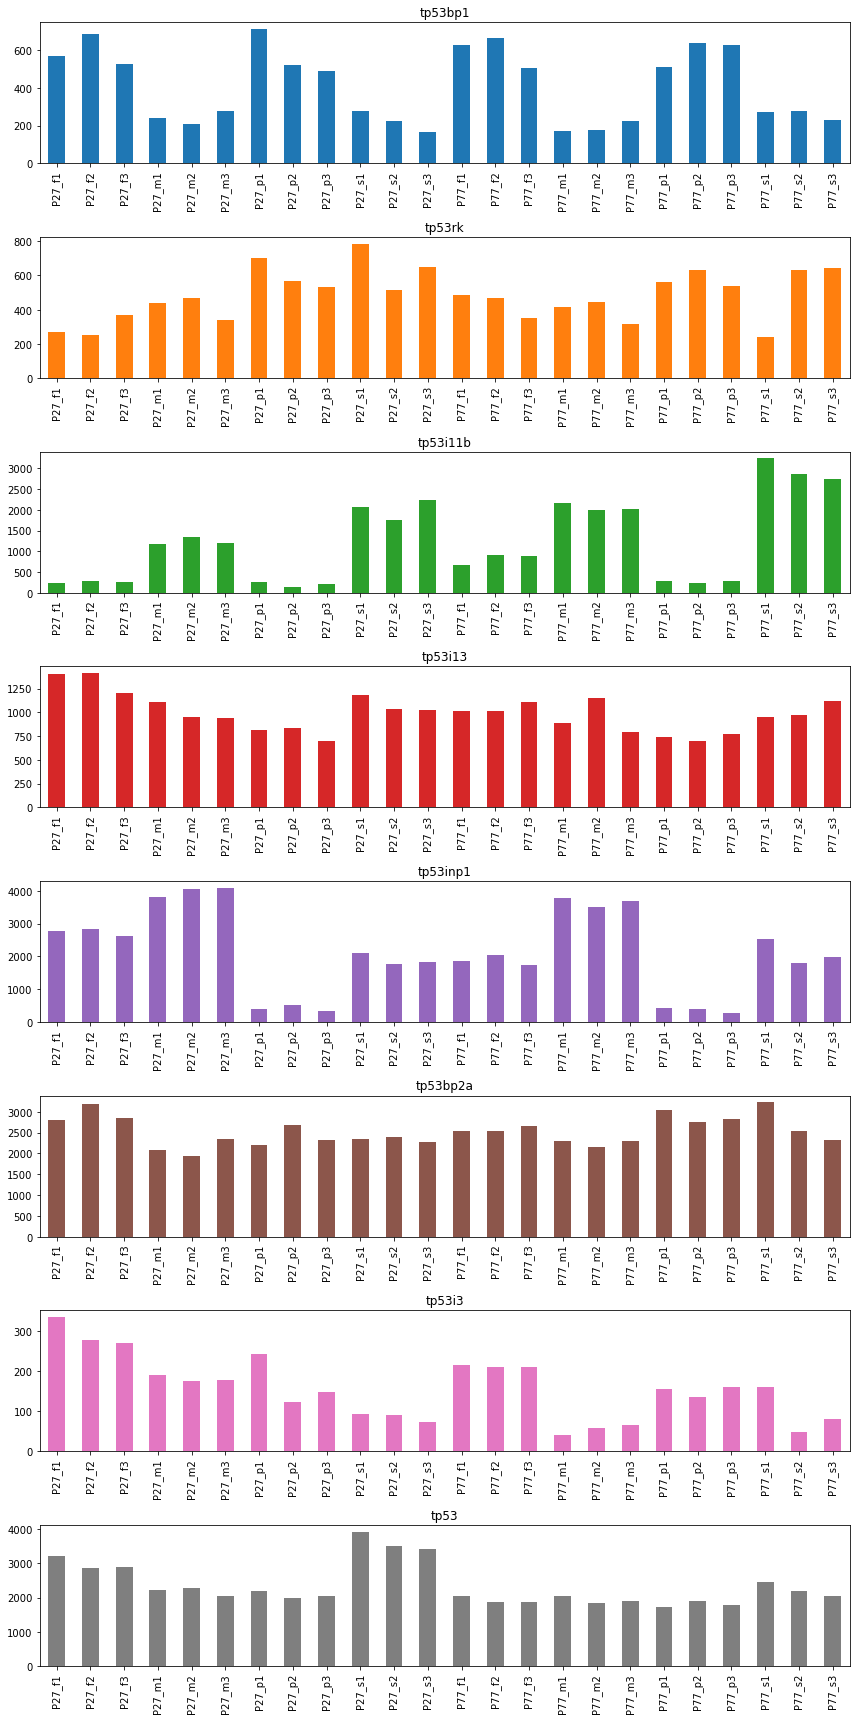

In [19]:
barplot_goi('tp53')

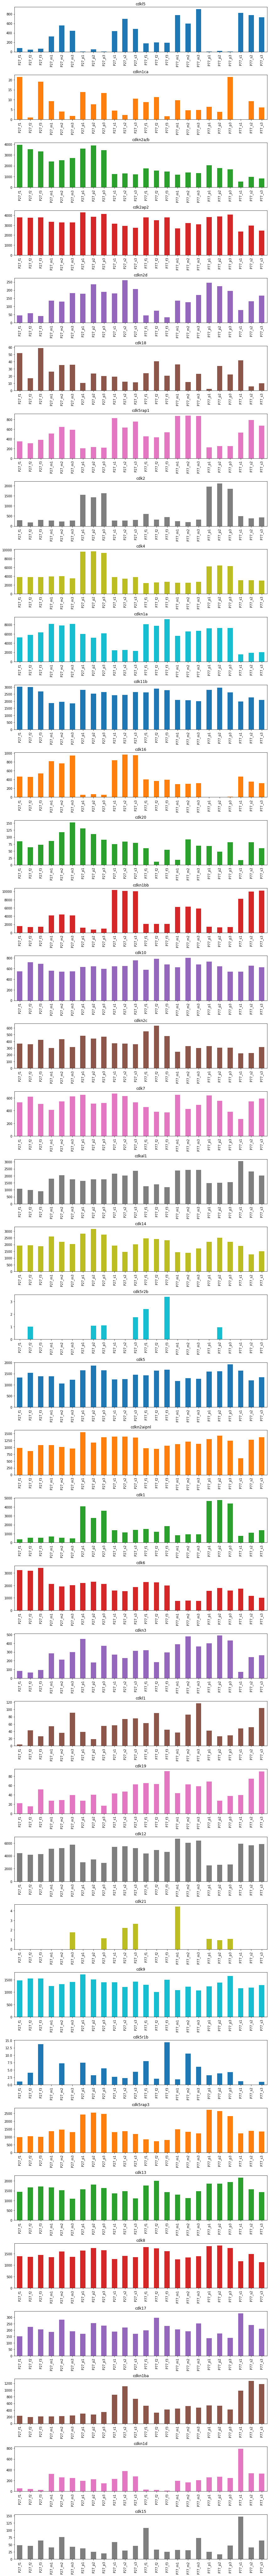

In [20]:
barplot_goi('cdk')

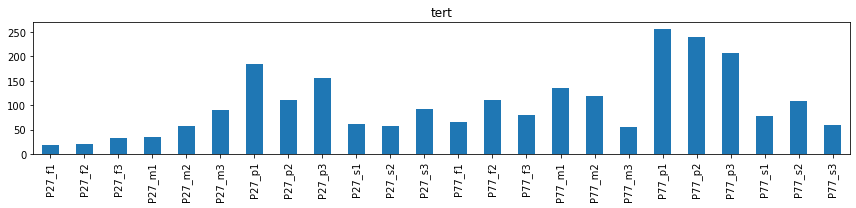

In [21]:
barplot_goi('tert')

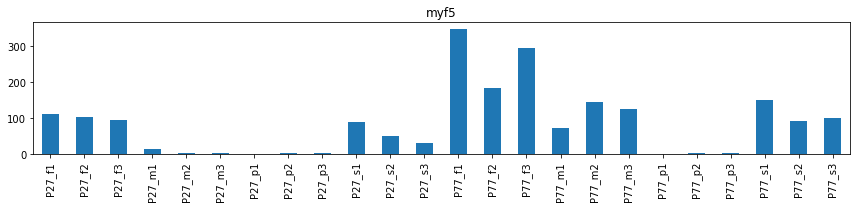

In [22]:
barplot_goi('myf5')

In [23]:
# PCA for just P conditions
df_p = df.iloc[:,df.columns.str.contains('_p')]

scaler_p = StandardScaler()
scaler_p.fit(df_p.T)
scaled_p = scaler_p.transform(df_p.T)

pca_p = PCA(n_components = 2)
pca_p.fit(scaled_p)

components_p = pca_p.transform(scaled_p)
pca_df_p = pd.DataFrame(data = components_p, columns = ['Principal Component 1', 'Principal Component 2'])
pca_df_p.index = df_p.columns

pca_df_p['meta'] = pca_df_p.index
pca_df_p[['Passage', "protocol_replicate"]] = pca_df_p.meta.str.split('_', n = 1, expand = True)
pca_df_p['Protocol'] = pca_df_p.protocol_replicate.str[0]
pca_df_p['Replicate'] = pca_df_p.protocol_replicate.str[1]
pca_df_p = pca_df_p.drop(['meta','protocol_replicate'], axis = 1)
pca_df_p['Passage_Protocol'] = pca_df_p.Passage + '_' + pca_df_p.Protocol

C:\Users\Omen PC\AppData\Local\Temp\ipykernel_17484\3439612097.py:5: UserWarning:

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.



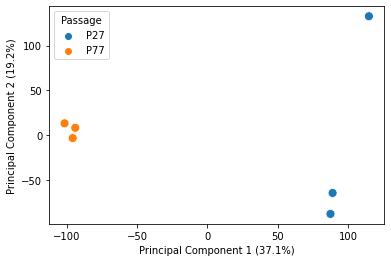

In [24]:
fig = plt.figure()
sns.scatterplot(data = pca_df_p, x = "Principal Component 1", y = "Principal Component 2", hue = 'Passage', s = 80)
plt.xlabel('Principal Component 1 (' + str(round(pca_p.explained_variance_ratio_[0]*100,1)) + '%)' )
plt.ylabel('Principal Component 2 (' + str(round(pca_p.explained_variance_ratio_[1]*100,1)) + '%)' )
fig.show()

In [25]:
df_p_scaled = pd.DataFrame(scaled_p.T, index = df_p.index, columns = df_p.columns)

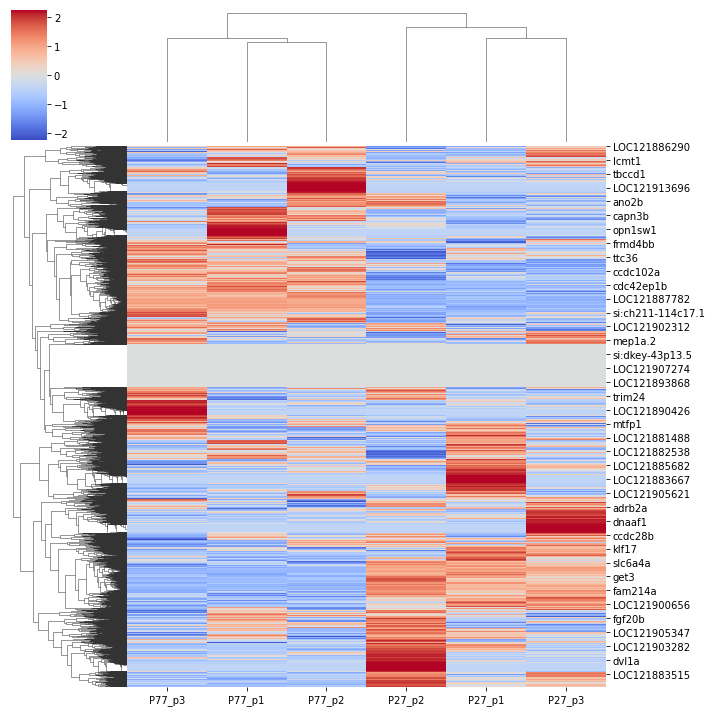

In [26]:
sns.clustermap(df_p_scaled, cmap = 'coolwarm')

In [27]:
df_p_pca_loadings = pd.DataFrame(pca_p.components_.T, columns = ['PC1', 'PC2'], index = df_p.index)
df_p_pca_loadings_contribution = pd.DataFrame(pca_p.components_.T * np.sqrt(pca_p.explained_variance_), columns = ['PC1', 'PC2'], index = df_p.index)

PC1_p_top20 = df_p_pca_loadings.sort_values(by = ['PC1'], ascending=False).head(20)
PC1_p_bottom20 = df_p_pca_loadings.sort_values(by = ['PC1'], ascending=True).head(20)
PC2_p_top20 = df_p_pca_loadings.sort_values(by = ['PC2'], ascending=False).head(20)
PC2_p_bottom20 = df_p_pca_loadings.sort_values(by = ['PC2'], ascending=True).head(20)

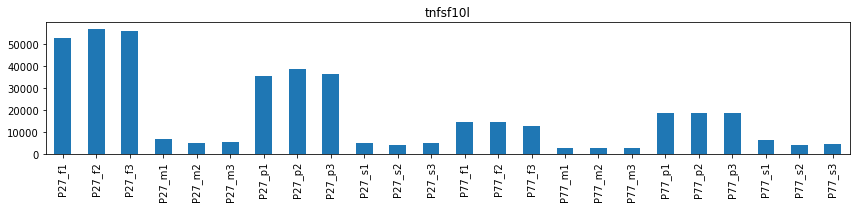

In [28]:
barplot_goi('tnfsf10l')

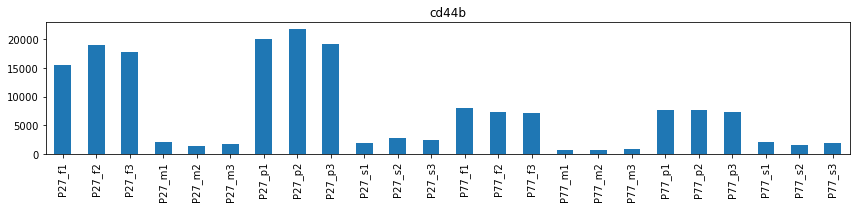

In [29]:
barplot_goi('cd44b')

# Work from Nico's script data to look at immortalization

In [68]:
df_wo_int_genes = pd.read_csv('output/dataframes/df_without_interaction_genes.csv')
df_wo_int_genes = df_wo_int_genes.iloc[:,1:]

df_wo_int_pathways = pd.read_csv('output/dataframes/df_without_interaction_pathways.csv')
df_wo_int_pathways = df_wo_int_pathways.iloc[:,1:]

df_wo_int_kegg = pd.read_csv('output/dataframes/df_without_interaction_kegg.csv')
df_wo_int_kegg = df_wo_int_kegg.iloc[:,1:]


df_f_genes = pd.read_csv('output/dataframes/df_f_genes.csv')
df_f_genes = df_f_genes.iloc[:,1:]

df_f_pathways = pd.read_csv('output/dataframes/df_f_pathways.csv')
df_f_pathways = df_f_pathways.iloc[:,1:]

df_f_kegg = pd.read_csv('output/dataframes/df_f_kegg.csv')
df_f_kegg = df_f_kegg.iloc[:,1:]


df_m_genes = pd.read_csv('output/dataframes/df_m_genes.csv')
df_m_genes = df_m_genes.iloc[:,1:]

df_m_pathways = pd.read_csv('output/dataframes/df_m_pathways.csv')
df_m_pathways = df_m_pathways.iloc[:,1:]

df_m_kegg = pd.read_csv('output/dataframes/df_m_kegg.csv')
df_m_kegg = df_m_kegg.iloc[:,1:]


df_p_genes = pd.read_csv('output/dataframes/df_p_genes.csv')
df_p_genes = df_p_genes.iloc[:,1:]

df_p_pathways = pd.read_csv('output/dataframes/df_p_pathways.csv')
df_p_pathways = df_p_pathways.iloc[:,1:]

df_p_kegg = pd.read_csv('output/dataframes/df_p_kegg.csv')
df_p_kegg = df_p_kegg.iloc[:,1:]


df_s_genes = pd.read_csv('output/dataframes/df_s_genes.csv')
df_s_genes = df_s_genes.iloc[:,1:]

df_s_pathways = pd.read_csv('output/dataframes/df_s_pathways.csv')
df_s_pathways = df_s_pathways.iloc[:,1:]

df_s_kegg = pd.read_csv('output/dataframes/df_s_kegg.csv')
df_s_kegg = df_s_kegg.iloc[:,1:]


In [69]:
# How many genes have p_adj below 0.05
print('Signficant genes below 0.05 \n')
print('Without Interaction: ' +  str(sum(df_wo_int_genes['adj.P.Val'] < 0.05)))
print('F Interaction: ' +  str(sum(df_f_genes['adj.P.Val'] < 0.05)))
print('M Interaction: ' +  str(sum(df_m_genes['adj.P.Val'] < 0.05)))
print('P Interaction: ' +  str(sum(df_p_genes['adj.P.Val'] < 0.05)))
print('S Interaction: ' +  str(sum(df_s_genes['adj.P.Val'] < 0.05)))


# How many genes have p_adj below 0.01
print('\n \nSignficant genes below 0.01 \n')
print('Without Interaction: ' +  str(sum(df_wo_int_genes['adj.P.Val'] < 0.01)))
print('F Interaction: ' +  str(sum(df_f_genes['adj.P.Val'] < 0.01)))
print('M Interaction: ' +  str(sum(df_m_genes['adj.P.Val'] < 0.01)))
print('P Interaction: ' +  str(sum(df_p_genes['adj.P.Val'] < 0.01)))
print('S Interaction: ' +  str(sum(df_s_genes['adj.P.Val'] < 0.01)))

# How many genes have p_adj below 0.001
print('\n \nSignficant genes below 0.001 \n')
print('Without Interaction: ' +  str(sum(df_wo_int_genes['adj.P.Val'] < 0.001)))
print('F Interaction: ' +  str(sum(df_f_genes['adj.P.Val'] < 0.001)))
print('M Interaction: ' +  str(sum(df_m_genes['adj.P.Val'] < 0.001)))
print('P Interaction: ' +  str(sum(df_p_genes['adj.P.Val'] < 0.001)))
print('S Interaction: ' +  str(sum(df_s_genes['adj.P.Val'] < 0.001)))

Signficant genes below 0.05 

Without Interaction: 6250
F Interaction: 6206
M Interaction: 5461
P Interaction: 4117
S Interaction: 3944

 
Signficant genes below 0.01 

Without Interaction: 4338
F Interaction: 4473
M Interaction: 3811
P Interaction: 2797
S Interaction: 2289

 
Signficant genes below 0.001 

Without Interaction: 2632
F Interaction: 3059
M Interaction: 2588
P Interaction: 1749
S Interaction: 1301


In [72]:
# Highest ratio and p-value of pathway
df_wo_int_kegg

gene_id     logFC      CI.L      CI.R    AveExpr          t  \
0      LOC121897605  4.052195  3.756186  4.348203   4.633502  28.181496   
1      LOC121904287  2.965081  2.730116  3.200045   4.623050  25.978350   
2              lepa  2.569588  2.356364  2.782812   3.557634  24.808808   
3      LOC121899156  2.562784  2.322420  2.803147   4.640521  21.949316   
4      LOC121890410  3.999559  3.623690  4.375429   4.827784  21.905497   
...             ...       ...       ...       ...        ...        ...   
18732         rpl32  0.002565 -0.132090  0.137219   9.416558   0.039209   
18733  LOC121885036 -0.006889 -0.202347  0.188569   9.821017  -0.072555   
18734  LOC121893783  0.002392 -0.237307  0.242091   9.730062   0.020542   
18735         rpl12  0.003666 -0.098575  0.105907  10.175273   0.073814   
18736        col1a2  0.029293 -0.184752  0.243338  12.799342   0.281730   

            P.Value     adj.P.Val          B  \
0      1.379478e-20  2.584727e-16  36.839232   
1      1.006180e-19  9.426394e-16  34.925151   
2      3.082549e-19  1.925257e-15  33.498249   
3      5.928083e-18  2.330673e-14  31.099411   
4      6.219439e-18  2.330673e-14  30.987989   
...             ...           ...        ...   
18732  9.690328e-01  9.828333e-01  -7.727528   
18733  9.427324e-01  9.679953e-01  -7.733968   
18734  9.837727e-01  9.902202e-01  -7.734731   
18735  9.417405e-01  9.673128e-01  -7.741156   
18736  7.804491e-01  8.644040e-01  -7.752089   

                                             description  hit_num  \
0      cartilage intermediate layer protein, nucleoti...        1   
1                           uncharacterized LOC121904287        2   
2                                               leptin a        3   
3                                  alpha-2-macroglobulin        4   
4                  23 kDa integral membrane protein-like        5   
...                                                  ...      ...   
18732                              ribosomal protein L32    18733   
18733                     ferritin, liver middle subunit    18734   
18734                          40S ribosomal protein S26    18735   
18735                              ribosomal protein L12    18736   
18736                          collagen, type I, alpha 2    18737   

          gene_name  
0      LOC121897605  
1      LOC121904287  
2              lepa  
3      LOC121899156  
4      LOC121890410  
...             ...  
18732         rpl32  
18733  LOC121885036  
18734  LOC121893783  
18735         rpl12  
18736        col1a2  

[18737 rows x 12 columns]

In [65]:
df_wo_int_pathways.nlargest(10, ['ratio'])

Term            Ontology  \
105                                 skin morphogenesis  Biological Process   
379  tangential migration from the subventricular z...  Biological Process   
179                     oxaloacetate metabolic process  Biological Process   
510                  border follicle cell delamination  Biological Process   
511       positive regulation of DNA endoreduplication  Biological Process   
512                      muscle thin filament assembly  Biological Process   
316  positive regulation of Golgi to plasma membran...  Biological Process   
695                          ethanol metabolic process  Biological Process   
696  substrate-dependent cerebral cortex tangential...  Biological Process   
697                      filtration diaphragm assembly  Biological Process   

        ratio    pvalue  p.adjust    qvalue          ID GeneRatio   BgRatio  \
105  2.813216  0.000011  0.000935  0.000788  GO:0043589   11/4888  11/13751   
379  2.344347  0.000971  0.022334  0.018823  GO:0022028   10/4888  12/13751   
179  2.316766  0.000104  0.005061  0.004265  GO:0006107   14/4888  17/13751   
510  2.301722  0.002302  0.039406  0.033210  GO:0030709    9/4888  11/13751   
511  2.301722  0.002302  0.039406  0.033210  GO:0032877    9/4888  11/13751   
512  2.301722  0.002302  0.039406  0.033210  GO:0071689    9/4888  11/13751   
316  2.250573  0.000560  0.015499  0.013062  GO:0042998   12/4888  15/13751   
695  2.250573  0.005367  0.067085  0.056538  GO:0006067    8/4888  10/13751   
696  2.250573  0.005367  0.067085  0.056538  GO:0021825    8/4888  10/13751   
697  2.250573  0.005367  0.067085  0.056538  GO:0036058    8/4888  10/13751   

     Count                                             geneID  
105     11  fbln1/itga2.2/errfi1a/LOC121896445/fgfr1a/psen...  
379     10  robo1/ogdhb/LOC121909664/fgfr1a/slit1a/srfb/sl...  
179     14  ghra/LOC121912900/LOC121885865/LOC121889179/go...  
510      9  mark1/mark2b/LOC121897079/LOC121895711/stk11/l...  
511      9  cdk4/ccnd2a/cdk6/otud4/e2f8/bmp4/bmp2b/e2f7/pole2  
512      9  wdr1/actb1/lasp1/LOC121887522/LOC121888075/tmo...  
316     12  LOC121903750/LOC121900032/LOC121900198/dennd4c...  
695      8  gpd1b/LOC121901688/LOC121906420/LOC121895409/L...  
696      8  robo1/sema3ab/LOC121909664/fgfr1a/nrp2a/slit2/...  
697      8  LOC121895059/kirrel3l/kirrel1a/tjp2a/ptpro/kir...

In [ ]:
# Lowest ratio and p-value of pathway